# GTEx Tissue

Author: Moshe Silverstein <br/>
Date: 12-2017 <br/>
Data Source Home: https://www.gtexportal.org/home/ <br/>
Data Source Downlaod: https://www.gtexportal.org/home/datasets

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [112]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Mon Mar 05 11:48:30 2018 EST

# Load Data

In [5]:
file = 'Input/GTEx_Analysis_v6p_RNA-seq_RNA-SeQCv1.1.8_gene_rpkm.gct'
matrix = pd.read_csv(file, sep='\t' ,skiprows=2)

In [6]:
matrix.head()

,Name,Description,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972.4,DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
1,ENSG00000227232.4,WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
2,ENSG00000243485.2,MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000237613.2,FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000268020.2,OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
matrix.shape

(56238, 8557)

# Load Sample Metadata

In [8]:
sample_meta = pd.read_csv('Input/GTEx_Data_V6_Annotations_SampleAttributesDS.txt', sep='\t', index_col=0)

In [9]:
sample_meta.head()

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMTSTPTREF,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,NaN,NaN,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,NaN,NaN,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0226-SM-5GZZ7,0.0,B1,"2 pieces, ~15% vessel stroma, rep delineated",6.8,Adipose Tissue,Adipose - Subcutaneous,2190,1214.0,1125.0,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0426-SM-5EGHI,0.0,B1,"2 pieces, !5% fibrous connective tissue, delin...",7.1,Muscle,Muscle - Skeletal,11907,1220.0,1119.0,Actual Death,...,12207544.0,10849322.0,0.002745,12393839.0,50.378628,0.008671,0.94627,837.0,0.276804,50.254814
GTEX-1117F-0526-SM-5EGHJ,0.0,B1,"2 pieces, clean, Monckebeg medial sclerosis, r...",8.0,Blood Vessel,Artery - Tibial,7610,1221.0,1120.0,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sample_meta.shape

(11983, 63)

# Load Subject Metadata

In [11]:
subject_meta = pd.read_csv('Input/GTEx_Data_V6_Annotations_SubjectPhenotypesDS.txt', sep='\t', index_col=0)

change gender from 1,2 to M,F

In [12]:
def geneder(s):
    if s == 1:
        return('M')
    elif s== 2:
        return('F')

In [13]:
subject_meta['GENDER'] = subject_meta['GENDER'].map(geneder)

In [14]:
subject_meta.head()

,GENDER,AGE,DTHHRDY
SUBJID,,,
GTEX-N7MS,M,60-69,2.0
GTEX-NFK9,M,40-49,0.0
GTEX-NL3G,F,60-69,2.0
GTEX-NL4W,M,50-59,4.0
GTEX-NPJ7,F,60-69,4.0


In [15]:
subject_meta.shape

(570, 3)

In [16]:
sample_meta = sample_meta['SMTSD']

In [1]:
combined_sample_meta = pd.DataFrame(columns=['Donor', 'Gender', 'Age', 'Tissue'])


for i,index in enumerate(sample_meta.index):
    
    progressPercent = ((i+1)/len(sample_meta.index))*100

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(sample_meta.index)))
    sys.stdout.flush()
    
    if ('-').join(index.split('-')[0:2]) in subject_meta.index:
#         combined_sample_meta.loc[index, 'Sample'] = index
        combined_sample_meta.loc[index, 'Donor'] = ('-').join(index.split('-')[0:2])
        combined_sample_meta.loc[index, 'Gender'] = subject_meta.loc[combined_sample_meta.loc[index, 'Donor'], 'GENDER']
        combined_sample_meta.loc[index, 'Age'] = subject_meta.loc[combined_sample_meta.loc[index, 'Donor'], 'AGE']
        combined_sample_meta.loc[index, 'Tissue'] = sample_meta.loc[index]
        
combined_sample_meta.set_index('Tissue', inplace=True)


NameError: name 'pd' is not defined

In [18]:
combined_sample_meta.head()

,Donor,Gender,Age
Tissue,,,
Whole Blood,GTEX-1117F,F,60-69
Whole Blood,GTEX-1117F,F,60-69
Adipose - Subcutaneous,GTEX-1117F,F,60-69
Muscle - Skeletal,GTEX-1117F,F,60-69
Artery - Tibial,GTEX-1117F,F,60-69


# Set Matrix to Show Gene Symbols

In [19]:
matrix.rename(columns={"Description": "Gene Symbol"}, inplace=True)

In [20]:
matrix.set_index('Gene Symbol', inplace=True)

In [21]:
matrix.drop('Name', axis=1, inplace=True)

In [22]:
matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,0.000000,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Map Sample Metadata to Tissue

In [23]:
sample_meta = pd.read_csv('Input/GTEx_Data_V6_Annotations_SampleAttributesDS.txt', sep='\t', index_col=0)

lst = []

for i,col in enumerate(matrix.columns):
    
    progressPercent = ((i+1)/len(matrix.columns))*100

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.columns)))
    sys.stdout.flush()
    
#     donor = 'Donor:'+('-').join(col.split('-')[0:2])
#     gender = 'Gender:'+subject_meta.loc[donor.split(':')[1], 'GENDER']
#     age = 'Age:'+subject_meta.loc[donor.split(':')[1], 'AGE']
#     tissue = 'Tissue:'+sample_meta.loc[col, 'SMTSD']
    lst.append(sample_meta.loc[col, 'SMTSD'])
    
matrix.columns = lst

In [24]:
matrix.head()

,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,...,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,0.000000,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Histogram of First Tissue

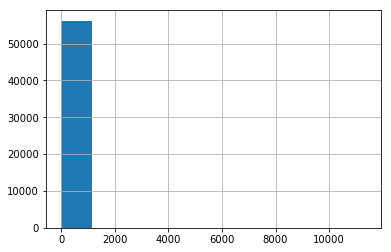

In [25]:
matrix.iloc[:, 0].hist()

# Histogram of First Gene

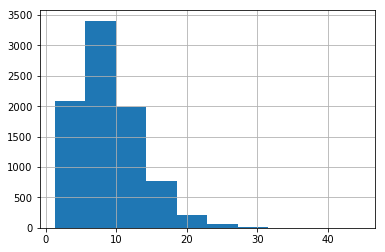

In [26]:
matrix.iloc[1, :].hist()

# Save Unfiltered Sample Matrix To File

In [27]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [28]:
matrix.shape

(56238, 8555)

In [29]:
normalized_matrix = matrix.copy()

In [30]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [31]:
normalized_matrix.shape

(40837, 8555)

In [32]:
normalized_matrix.head()

,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,...,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood
DDX11L1,0.085107,0.085107,0.085107,0.085107,0.085107,0.085107,0.023956,0.085107,0.085107,0.085107,...,0.019434,0.061915,0.085107,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.508960,10.745692,6.670499,6.384469,6.833630,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,...,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197
RP11-34P13.7,0.236921,0.322958,0.265657,0.216597,0.232878,0.290084,0.218548,0.281672,0.369737,0.234941,...,0.072531,0.552016,0.835682,0.101835,0.349369,0.131001,1.084733,0.088808,0.324725,0.319094
CICP27,0.052053,0.003991,0.027454,0.011192,0.052053,0.052053,0.052053,0.052053,0.022719,0.025846,...,0.022903,0.233496,0.388104,0.012863,0.182030,0.087997,1.354209,0.020191,0.383337,0.238644


# Log2 Transform

In [33]:
normalized_matrix = mf.log2(normalized_matrix)

In [34]:
normalized_matrix.head()

,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,...,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood
DDX11L1,0.117837,0.117837,0.117837,0.117837,0.117837,0.117837,0.034153,0.117837,0.117837,0.117837,...,0.027769,0.086669,0.117837,0.019550,0.421523,0.364223,0.065863,0.354349,0.164107,0.057276
WASH7P,2.908613,3.554060,2.939320,2.884494,2.969681,3.020708,3.162589,2.975262,2.964461,2.433976,...,1.957788,3.304059,2.511457,2.787481,3.231287,2.894467,3.302956,3.783131,3.151571,3.350856
MIR1302-11,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,...,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034
RP11-34P13.7,0.306753,0.403767,0.339887,0.282851,0.302030,0.367466,0.285163,0.358027,0.453899,0.304442,...,0.101020,0.634144,0.876316,0.139909,0.432285,0.177600,1.059863,0.122750,0.405692,0.399547
CICP27,0.073208,0.005746,0.039074,0.016057,0.073208,0.073208,0.073208,0.073208,0.032410,0.036814,...,0.032670,0.302753,0.473115,0.018439,0.241266,0.121675,1.235243,0.028839,0.468153,0.308762


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [35]:
tissues = normalized_matrix.columns

In [36]:
numbers = np.arange(0,normalized_matrix.shape[1])

In [37]:
normalized_matrix.columns = numbers

In [38]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [39]:
normalized_matrix.columns = tissues

In [40]:
normalized_matrix.head()

,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,...,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood
DDX11L1,0.120216,0.126208,0.122942,0.118518,0.122915,0.117452,0.031015,0.123603,0.114756,0.127741,...,0.041213,0.109348,0.132113,0.022759,0.630082,0.467087,0.075445,0.526564,0.192945,0.068675
WASH7P,2.697853,3.307184,2.720195,2.814279,2.818253,2.913809,2.915709,2.842501,2.842239,2.359022,...,3.305326,3.564138,3.308724,3.604828,3.815083,3.451737,3.763502,4.333413,3.599214,3.631638
MIR1302-11,0.073530,0.079854,0.076224,0.071785,0.075674,0.070094,0.068096,0.075811,0.068744,0.079371,...,0.089259,0.093254,0.080476,0.076293,0.077751,0.072844,0.081596,0.082231,0.084603,0.083909
RP11-34P13.7,0.320060,0.408437,0.345392,0.291568,0.314236,0.386331,0.274221,0.391483,0.447105,0.334021,...,0.124465,0.995349,1.542996,0.152898,0.654664,0.194332,1.780547,0.140895,0.566972,0.544290
CICP27,0.074448,0.006859,0.041731,0.016381,0.076660,0.071085,0.069217,0.076752,0.029451,0.042910,...,0.046566,0.410374,0.760015,0.021679,0.290433,0.126420,2.003971,0.036647,0.674897,0.389885


# Nomalize Matrix (z-score the rows)

In [41]:
genes = normalized_matrix.index

In [42]:
normalized_matrix.reset_index(inplace=True)

In [43]:
normalized_matrix.drop('index', axis=1, inplace=True)

In [44]:
mf.zscore(normalized_matrix, 'row')

In [45]:
normalized_matrix.index = genes

In [46]:
normalized_matrix.head()

,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,...,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood
DDX11L1,0.311237,0.620797,0.452053,0.223522,0.450667,0.168406,-4.297352,0.486194,0.029124,0.700013,...,-3.770482,-0.250279,0.925908,-4.723878,26.653477,18.232342,-2.001888,21.305243,4.068753,-2.351668
WASH7P,-0.974743,0.251431,-0.929784,-0.740456,-0.732459,-0.540169,-0.536345,-0.683664,-0.684192,-1.656584,...,0.247693,0.768508,0.254529,0.850389,1.273493,0.542320,1.169694,2.316543,0.839093,0.904339
MIR1302-11,0.204646,0.879927,0.492279,0.018311,0.433573,-0.162271,-0.375649,0.448230,-0.306486,0.828326,...,1.884262,2.310855,0.946391,0.499637,0.655380,0.131312,1.065909,1.133754,1.387053,1.312986
RP11-34P13.7,0.573569,1.272680,0.773958,0.348175,0.527494,1.097812,0.210954,1.138567,1.578572,0.684006,...,-0.973714,5.915525,10.247751,-0.748786,3.220490,-0.421020,12.126931,-0.843743,2.526796,2.347361
CICP27,0.261171,-2.324845,-0.990625,-1.960552,0.345816,0.132491,0.061033,0.349343,-1.460446,-0.945491,...,-0.805635,13.114096,26.491779,-1.757819,8.525019,2.249680,74.087068,-1.185117,23.235088,12.330165


# Merge Like Column (by taking the mean)

In [47]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [48]:
normalized_matrix.shape

(40837, 53)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [49]:
mf.mapgenesymbols(normalized_matrix)

In [50]:
normalized_matrix.shape

(25837, 53)

# Merge Duplicate Genes By Rows

In [51]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [52]:
normalized_matrix.shape

(25577, 53)

# Histogram of First Tissue

In [2]:
normalized_matrix.iloc[:, 0].hist(bins=100)

NameError: name 'normalized_matrix' is not defined

# Histogram of First Gene

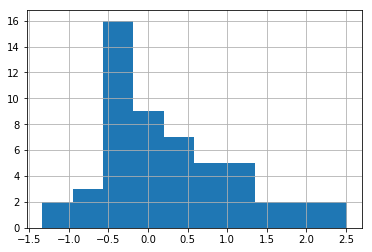

In [54]:
normalized_matrix.iloc[1, :].hist()

# HeatMap (clustergrammer) of Data

In [55]:
# net.load_df(normalized_tissue_matrix)
# net.filter_N_top('row', rank_type='sum', N_top=50)
# net.cluster()
# net.widget()

# Save Filtered Tissue Matrix To File

In [56]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [57]:
gene_list = mf.createGeneList(normalized_matrix)

In [58]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2M-AS1,144571


In [59]:
gene_list.shape

(25577, 2)

# Save Gene List

In [60]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Attribute List

In [99]:
attribute_list = mf.createAttributeList(normalized_matrix)

In [100]:
attribute_list.head()

""
Attributes
Adipose - Subcutaneous
Adipose - Visceral (Omentum)
Adrenal Gland
Artery - Aorta
Artery - Coronary


In [101]:
attribute_list.shape

(53, 0)

# Save Attribute List

In [102]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [65]:
standard_matrix = mf.createStandardizedMatix(normalized_matrix)

In [66]:
standard_matrix.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
index,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.379696,-0.115545,-0.681582,-0.266488,0.601436,0.375021,-0.870262,0.525965,0.110870,0.337285,...,-0.530639,-0.568375,-0.417432,0.450493,-0.794790,-0.983469,-0.304224,0.412757,0.186342,-0.040073
A1BG-AS1,-0.379696,-0.077809,-0.606111,-0.115545,0.752380,0.488229,-0.832526,-0.455167,0.299550,-0.191016,...,-0.304224,-0.719318,0.148606,0.827851,-0.757054,-0.983469,0.186342,0.714644,0.337285,0.375021
A1CF,0.488229,0.525965,-0.794790,-0.379696,-0.417432,-0.002337,-0.945733,0.714644,0.563701,0.450493,...,-0.341960,-0.115545,0.941059,-0.228752,0.299550,-0.907998,-0.568375,0.224078,-0.040073,0.790116
A2M,0.766145,0.803881,-0.101779,0.954824,0.917088,0.879353,0.841617,-0.516874,-0.630081,-0.328195,...,-0.592345,-0.441402,0.162372,0.200107,0.124636,-0.781025,0.464258,0.690673,-0.064044,-0.931968
A2M-AS1,0.337285,0.110870,0.601436,0.790116,0.639172,0.563701,0.375021,-0.341960,-0.530639,-0.379696,...,-0.907998,-0.832526,-0.304224,0.148606,-0.228752,-0.455167,-0.266488,0.978795,0.035399,-0.983469


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

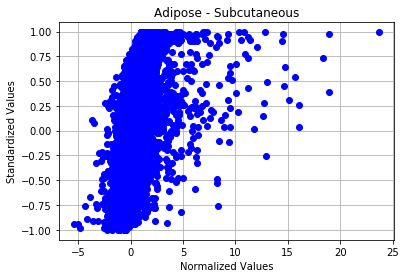

In [67]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [68]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [69]:
tertiary_matrix = mf.createTertiaryMarix(standard_matrix)

In [70]:
tertiary_matrix.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-1


# Save Teriary Matrix

In [71]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

## Path to output files

In [113]:
path = '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/Output/'

# Create Up Gene Set Library

In [73]:
name = 'gtex_tissue_gene_up_set'

In [74]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [75]:
name = 'gtex_tissue_gene_down_set'

In [76]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [114]:
name = 'gtex_tissue_attribute_up_set'

In [115]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [79]:
name = 'gtex_tissue_attribute_down_set'

In [80]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [81]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [82]:
attribute_similarity_matix.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
Adipose - Subcutaneous,1.000000,0.789059,0.281738,0.489377,0.620167,0.571742,0.340864,0.236818,0.200471,0.216307,...,0.305016,0.318489,0.303079,0.277162,0.339775,0.117168,0.302765,0.421665,0.414997,0.291557
Adipose - Visceral (Omentum),0.789059,1.000000,0.269857,0.438466,0.561241,0.465378,0.288036,0.231773,0.196829,0.214335,...,0.261706,0.262657,0.291885,0.306221,0.332895,0.124670,0.282285,0.370222,0.358886,0.351851
Adrenal Gland,0.281738,0.269857,1.000000,0.271926,0.286877,0.282855,0.205605,0.258183,0.249643,0.249236,...,0.183357,0.183235,0.178633,0.255169,0.248664,0.156004,0.209881,0.233664,0.202565,0.188991
Artery - Aorta,0.489377,0.438466,0.271926,1.000000,0.823787,0.793031,0.328908,0.277558,0.255536,0.267499,...,0.254963,0.260265,0.236404,0.181058,0.353317,0.119913,0.271086,0.450412,0.332195,0.286175
Artery - Coronary,0.620167,0.561241,0.286877,0.823787,1.000000,0.770014,0.370312,0.272518,0.244324,0.254590,...,0.275104,0.282380,0.261671,0.257821,0.391866,0.129489,0.308362,0.487981,0.363698,0.289560


# HeatMap (clustergrammer) of Attribute Similarity Matrix

In [83]:
# net.load_df(attribute_tissue_similarity_matix)
# net.cluster()
# net.widget()

# Save Attribute Similarity Matrix

In [84]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene Similarity Matrix

In [85]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [86]:
gene_similarity_matix.head()

index,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
index,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.670530,0.700352,-0.036982,0.188727,-0.002169,0.064757,0.149581,-0.020731,-0.344608,...,-0.067185,-0.004352,-0.195506,0.338558,0.023454,0.254842,0.101556,-0.254549,-0.320507,0.067506
A1BG-AS1,0.670530,1.000000,0.301384,-0.185756,0.144398,-0.014163,-0.047253,0.170418,0.130615,-0.185025,...,0.147530,0.150345,0.071410,0.282958,-0.065868,0.252017,-0.004652,0.066450,-0.147893,0.117387
A1CF,0.700352,0.301384,1.000000,-0.012968,0.092855,0.102558,0.105591,0.138965,-0.018272,-0.355265,...,-0.038199,0.191511,-0.243847,0.239555,0.145520,0.322932,0.029283,-0.201933,0.029506,-0.096933
A2M,-0.036982,-0.185756,-0.012968,1.000000,0.640123,-0.193315,-0.048982,0.175231,-0.348648,0.652311,...,-0.300080,-0.436651,0.320866,0.206610,0.299693,-0.339057,-0.146809,0.399687,0.250573,0.312795
A2M-AS1,0.188727,0.144398,0.092855,0.640123,1.000000,-0.234668,-0.147980,0.366037,-0.109355,0.402957,...,-0.182423,-0.397346,0.377782,0.298837,0.158916,-0.110012,0.178655,0.460109,0.147956,0.272253


# HeatMap (clustergrammer) of Gene Similarity Matrix

In [87]:
sampling = gene_similarity_matix.iloc[0:50,0:50].copy()

In [88]:
# net.load_df(sampling)
# net.cluster()
# net.widget()

# Save Gene Similarity Matrix

In [89]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [90]:
path = '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/Output/'

In [91]:
name = 'gtex_tissue_gene_attribute_edge_list'

In [93]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  53 Out of 53   

 The number of statisticaly relevent gene-attribute associations is: 64221


In [94]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()